In [1]:
from graphchem.datasets import load_cn
from sklearn.model_selection import train_test_split

smiles, targets = load_cn()
smiles_train, smiles_test, targets_train, targets_test = train_test_split(
    smiles, targets, test_size=0.2, random_state=24
)

print(len(smiles_train), len(targets_train))
print(len(smiles_test), len(targets_test))

368 368
92 92


In [2]:
from graphchem import CompoundOperator

co = CompoundOperator()
train_loss, valid_loss = co.train(
    smiles_train, targets_train, verbose=8,
    valid_patience=32,
    batch_size=16,
    epochs=512,
    random_state=24,
    model_config={
        'n_messages': 3,
        'n_hidden': 1,
        'hidden_dim': 32,
        'dropout': 0.00
    }
)

Epoch: 0 | Train Loss: 475.0040868642379 | Valid Loss: 382.063232421875
Epoch: 8 | Train Loss: 250.36734278672407 | Valid Loss: 244.2720947265625
Epoch: 16 | Train Loss: 184.25439255902558 | Valid Loss: 237.761962890625
Epoch: 24 | Train Loss: 176.81942447999708 | Valid Loss: 226.4241943359375
Epoch: 32 | Train Loss: 159.60226378148917 | Valid Loss: 232.41561889648438
Epoch: 40 | Train Loss: 138.51519017641237 | Valid Loss: 220.8610076904297
Epoch: 48 | Train Loss: 132.98254228449193 | Valid Loss: 209.425537109375
Epoch: 56 | Train Loss: 143.42473726856466 | Valid Loss: 194.63925170898438
Epoch: 64 | Train Loss: 110.31876313605277 | Valid Loss: 180.41978454589844
Epoch: 72 | Train Loss: 108.24683888753255 | Valid Loss: 203.47933959960938
Epoch: 80 | Train Loss: 109.84524660694356 | Valid Loss: 179.48153686523438
Epoch: 88 | Train Loss: 92.07650780191227 | Valid Loss: 183.57615661621094
Epoch: 96 | Train Loss: 95.77529201377817 | Valid Loss: 185.33676147460938
Epoch: 104 | Train Loss: 8

In [3]:
from sklearn.metrics import median_absolute_error, r2_score

pred_train = co.use(smiles_train)
pred_test = co.use(smiles_test)
print('MAE Train: {}'.format(
    median_absolute_error(pred_train, targets_train)
))
print('MAE Test: {}'.format(
    median_absolute_error(pred_test, targets_test)
))
print('R2 Train: {}'.format(
    r2_score(pred_train, targets_train)
))
print('R2 Test: {}'.format(
    r2_score(pred_test, targets_test)
))


MAE Train: 3.341575813293457
MAE Test: 6.676198768615723
R2 Train: 0.9159582474929514
R2 Test: 0.7358356988156793


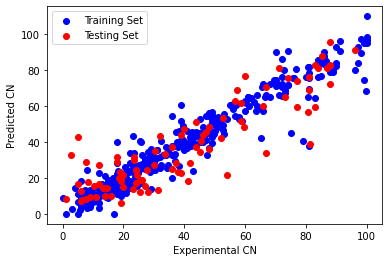

In [4]:
from matplotlib import pyplot as plt

plt.clf()
plt.xlabel('Experimental CN')
plt.ylabel('Predicted CN')
plt.scatter(targets_train, pred_train, color='blue', label='Training Set')
plt.scatter(targets_test, pred_test, color='red', label='Testing Set')
plt.legend(loc='upper left')
plt.show()

In [5]:
co.save_model('model.pt', 'encoder.enc')

In [6]:
co2 = CompoundOperator()
co2.load_model('model.pt', 'encoder.enc')
pred_train = co2.use(smiles_train)
pred_test = co2.use(smiles_test)
print('MAE Train: {}'.format(
    median_absolute_error(pred_train, targets_train)
))
print('MAE Test: {}'.format(
    median_absolute_error(pred_test, targets_test)
))
print('R2 Train: {}'.format(
    r2_score(pred_train, targets_train)
))
print('R2 Test: {}'.format(
    r2_score(pred_test, targets_test)
))

MAE Train: 3.341575813293457
MAE Test: 6.676198768615723
R2 Train: 0.9159582474929514
R2 Test: 0.7358356988156793


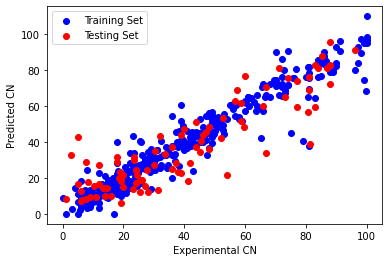

In [7]:
plt.clf()
plt.xlabel('Experimental CN')
plt.ylabel('Predicted CN')
plt.scatter(targets_train, pred_train, color='blue', label='Training Set')
plt.scatter(targets_test, pred_test, color='red', label='Testing Set')
plt.legend(loc='upper left')
plt.show()